In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import model_selection, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# **Week 18 Checkpoint**

In [2]:
# Define notebook constants

DIBOSON_FILEDIR = "dataset/Diboson.csv"
GGHIGGS_FILEDIR = "dataset/ggH1000.csv"
TOP_FILEDIR     = "dataset/Top.csv"
ZJETS_FILEDIR   = "dataset/Zjets.csv"
MODELS_OUTDIR   = "models/"

SEED            = 42

## **Exerise 1**

We will load in the datasets and explore them preforming any necesary processing steps along the way

In [3]:
# Open all csv files and convert them to dataframes
datasets_df = {
    "diboson"   : pd.read_csv(DIBOSON_FILEDIR, index_col=0),
    "gghiggs"   : pd.read_csv(GGHIGGS_FILEDIR, index_col=0),
    "top"       : pd.read_csv(TOP_FILEDIR, index_col=0),
    "zjets"     : pd.read_csv(ZJETS_FILEDIR, index_col=0),
}

Print out portions of the dataset to check that the csv files have been imported correctly

In [4]:
# Print out the head of each dataframe
print(f"Dataframe shape: {datasets_df['diboson'].shape}\n")
datasets_df["diboson"].head()

Dataframe shape: (155127, 24)



,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,1.914456,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,-0.145452,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,-2.816466,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,1.012053,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,-2.406883,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0


In [5]:
print(f"Dataframe shape: {datasets_df['gghiggs'].shape}\n")
datasets_df["gghiggs"].head()

Dataframe shape: (50013, 24)



,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


In [6]:
print(f"Dataframe shape: {datasets_df['top'].shape}\n")
datasets_df["top"].head()

Dataframe shape: (92416, 24)



,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,2.909157,...,0.164823,1.042927,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,3.050592,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,-0.619062,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,-2.554189,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,1.432744,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0


In [7]:
print(f"Dataframe shape: {datasets_df['zjets'].shape}\n")
datasets_df["zjets"].head()

Dataframe shape: (6579416, 24)



,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


In [8]:
# We now check if any of the dataframes contain NANs and we remove them if true
print(f"Does diboson contain NaNs?:    {datasets_df['diboson'].isnull().values.any()}")
print(f"Does ggH1000 contain NaNs?:    {datasets_df['gghiggs'].isnull().values.any()}")
print(f"Does Top contain NaNs?:        {datasets_df['top'].isnull().values.any()}")
print(f"Does Zjets contain NaNs?:      {datasets_df['zjets'].isnull().values.any()}")

# No need to remove NaNs

Does diboson contain NaNs?:    False
Does ggH1000 contain NaNs?:    False
Does Top contain NaNs?:        False
Does Zjets contain NaNs?:      False


We will now plot 1D distributions for thew following kinematic variables:

- lep1_pt
- lep2_pt
- fatjet_pt
- fetjet_eta
- fatjet_D2
- Z11_mass
- Z11_pt
- MET
- reco_zv_mass

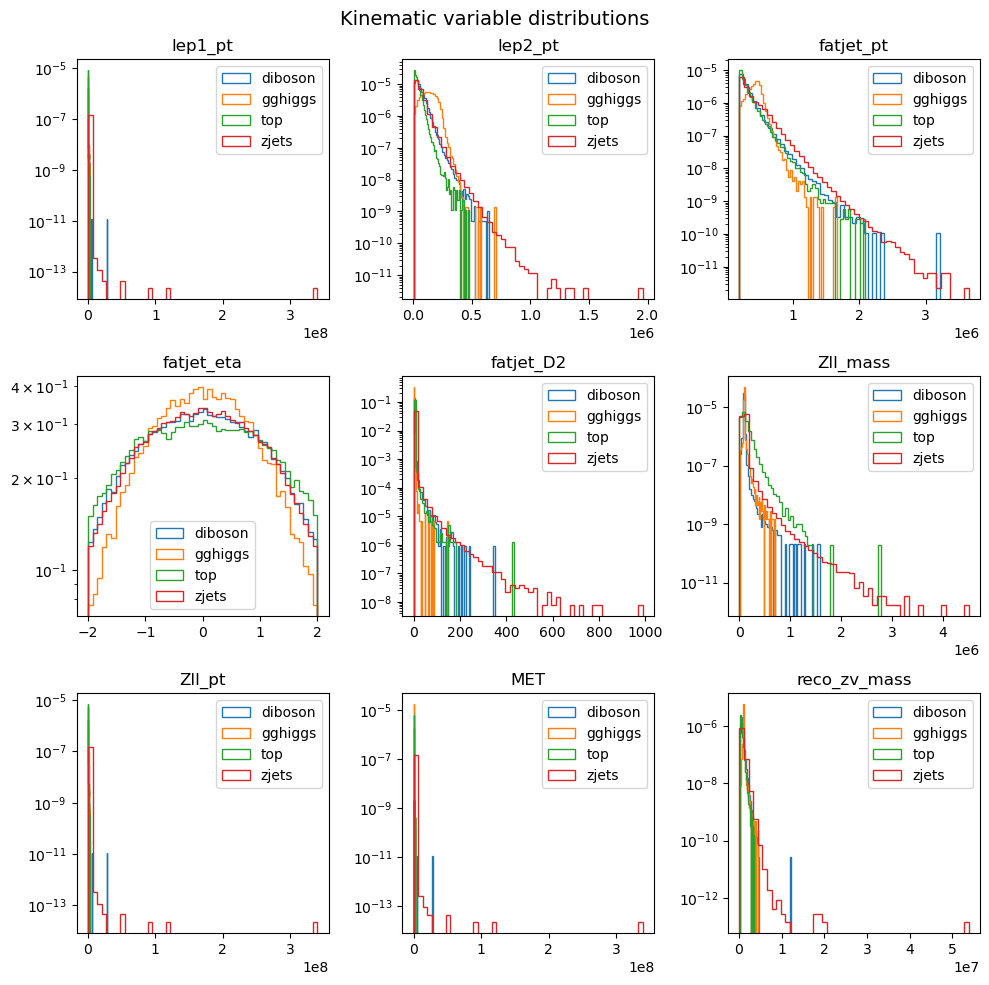

In [9]:
plot_kinematic_keys = ["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET", "reco_zv_mass"]

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax = ax.flatten()

# Iterate over all kinematic keys
for kinematic_key_idx, kinematic_key in enumerate(plot_kinematic_keys):

    # Iterate over all datasets
    for dataset_key in datasets_df:
        # Plot histogram of data
        ax[kinematic_key_idx].hist(
            datasets_df[dataset_key][kinematic_key],
            bins        = 50,
            histtype    = "step",
            density     = True,
            label       = dataset_key,
            log         = True
        ) 
        ax[kinematic_key_idx].legend()
        ax[kinematic_key_idx].set_title(kinematic_key)

fig.suptitle("Kinematic variable distributions", fontsize=14)
fig.tight_layout()

## **Exercise 2**

Now we will merge the signal and background datasets and create our input datasets for our neural network classifier

In [10]:
# Merge all background and signal samples from four datasets
merged_background_df = pd.concat(
    [dataset_df.loc[ dataset_df["isSignal"] == 0] for dataset_df in datasets_df.values()],
    ignore_index = True, 
)

merged_signal_df = pd.concat(
    [dataset_df.loc[ dataset_df["isSignal"] == 1] for dataset_df in datasets_df.values()],
    ignore_index = True, 
)

# Shuffle the merged dataframes 
merged_background_df    = shuffle(merged_background_df, random_state=SEED)
merged_signal_df        = shuffle(merged_signal_df, random_state=SEED)

# Reset the indexes fo the merged datasets
merged_background_df    = merged_background_df.reset_index(drop=True)
merged_signal_df        = merged_signal_df.reset_index(drop=True)

Now we will create a training dataset constaining a 50-50 split between signal and background features

In [11]:
# We first get the number of signal features available to us
num_signal_features = merged_signal_df.shape[0]

# We now create a dataframe containing the same nmumber of background and signal features
merged_dataset_df = pd.concat(
    [merged_signal_df, merged_background_df.iloc[:num_signal_features]]
)

# Shuffle the new merged dataset
merged_dataset_df = shuffle(merged_dataset_df, random_state=SEED)

# Reset index of new merged dataframe
merged_dataset_df = merged_dataset_df.reset_index(drop=True)

We will now plot 2d distributions for each combination of the features used to train the classifier

In [12]:
# Define the keys for the features and labels
feature_keys    = ["lep1_pt", "lep2_pt", "fatjet_pt", "fatjet_eta", "fatjet_D2", "Zll_mass", "Zll_pt", "MET"]
label_keys      = ["isSignal"]

# Define a dataset only ciontaining the features and label for the neural network classification
classification_dataset_df = merged_dataset_df[feature_keys + label_keys]

In [13]:
# We will now use seaborn's pairplot to create the 2d distributions 
plot_pairs=False
if plot_pairs:
    sns.pairplot(
        classification_dataset_df,
        hue = label_keys[0],
        # palette = {"0": "maroon", "1": "darkblue"},
        plot_kws=dict(marker="+", linewidth=1),
        corner = True,

    )

## **Exersice 3**

We will not create a a test-train split for our training and validtion data

In [14]:
# Create a numpy array of input features and label features
input_features = classification_dataset_df[feature_keys].values
label_features = classification_dataset_df[label_keys].values

# Define a standard scaler objject to scale datasets
standard_scaler = preprocessing.StandardScaler()

# Scale the input features
input_features = standard_scaler.fit_transform(input_features)

# Produce a test train split
val_size = 0.3
train_data, val_data, train_target, val_target = model_selection.train_test_split(
    input_features,
    label_features,
    test_size = val_size,
    random_state = SEED
)

In [15]:
# Print the shape of the train and val data to confirm everything worked as expected
print(f"Training data shape:        {train_data.shape}")
print(f"Training target shape:      {train_target.shape}")
print(f"Validation data shape:      {val_data.shape}")
print(f"Validation target shape:    {val_target.shape}")

Training data shape:        (70018, 8)
Training target shape:      (70018, 1)
Validation data shape:      (30008, 8)
Validation target shape:    (30008, 1)


## **Exercise 4**

Now that we have our training data prepared, we can start with creating a function which will produce a precompiled, customisable fully-connected dense NN classifier.

In [16]:
# Define the training hyperparameters
EPOCHS = 50
BATCH_SIZE = 512

In [17]:
def create_nn_classifier(num_inputs, num_outputs, features, activation, loss="binary_crossentropy", learning_rate=1e-3, metrics=["accuracy"]):
    
    """
    Function that will create a new compiled neural network 
    """

    # Define initial layer of the network
    network = tf.keras.models.Sequential([
        tf.keras.layers.Dense(features[0], activation=activation, input_dim=num_inputs, kernel_initializer="normal"),
        tf.keras.layers.Dropout(0.2),
    ])

    # Add the hidden layers of the neural network
    for feature in features[1:]:
        network.add(
            tf.keras.layers.Dense(feature, activation=activation, kernel_initializer="normal",)
        )
        network.add(
            tf.keras.layers.Dropout(0.1)
        )
    
    # Add output layer of neural network
    network.add(
        tf.keras.layers.Dense(num_outputs, activation="sigmoid", kernel_initializer="normal",)
    )

    # Define optimizer object
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compile and return the network
    network.compile(optimizer=optimizer, loss=loss, metrics=metrics,)

    return network

We now create a simple classifier with 2 hidden layers of 20 nodes and train it to classify the ATLAS datasets

In [18]:
# Define hyperparameters for simple network
simple_network_hyperparameters = {"features": [20, 20]}

# Create the classifier object
simple_network = create_nn_classifier(
    num_inputs          = len(feature_keys),
    num_outputs         = len(label_keys),
    features            = simple_network_hyperparameters["features"],
    activation          = "relu",
)

# We will now train the network
history = simple_network.fit(
    train_data,
    train_target,
    batch_size  = BATCH_SIZE,
    epochs      = EPOCHS,
    verbose     = 1,
    validation_data = (val_data, val_target)
)

Epoch 1/50


2024-03-11 23:05:20.563621: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


137/137 [==============================] - 2s 11ms/step - loss: 0.5399 - accuracy: 0.8190 - val_loss: 0.3620 - val_accuracy: 0.8612
Epoch 2/50
137/137 [==============================] - 1s 5ms/step - loss: 0.3354 - accuracy: 0.8711 - val_loss: 0.3191 - val_accuracy: 0.8724
Epoch 3/50
137/137 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8739 - val_loss: 0.3060 - val_accuracy: 0.8735
Epoch 4/50
137/137 [==============================] - 1s 4ms/step - loss: 0.3080 - accuracy: 0.8750 - val_loss: 0.3018 - val_accuracy: 0.8753
Epoch 5/50
137/137 [==============================] - 1s 5ms/step - loss: 0.3052 - accuracy: 0.8758 - val_loss: 0.2999 - val_accuracy: 0.8757
Epoch 6/50
137/137 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8759 - val_loss: 0.2992 - val_accuracy: 0.8746
Epoch 7/50
137/137 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8761 - val_loss: 0.2971 - val_accuracy: 0.8758
Epoch 8/50
137/1

We nw plot the loss and accuracy of the model during training

The final training accuracy is 89.03%
The final validation accuracy is 88.92%


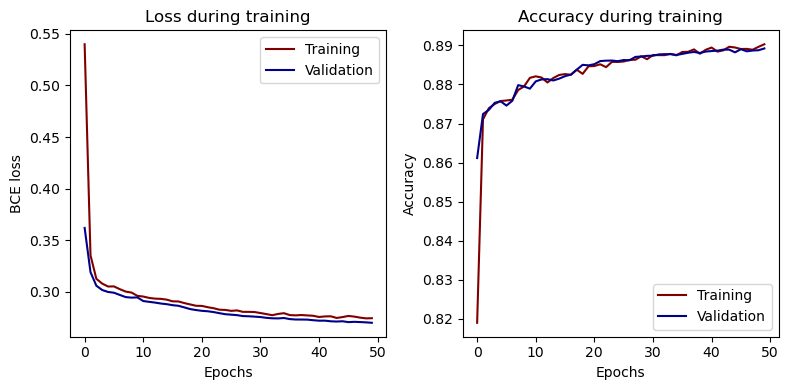

In [19]:
def plot_training_metrics(history_dict):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # Plot the loss 
    ax1.plot(history_dict["loss"], color="maroon", label="Training")
    ax1.plot(history_dict["val_loss"], color="darkblue", label="Validation")
    ax1.legend()
    ax1.set(
        xlabel = "Epochs",
        ylabel = "BCE loss",
        title  = "Loss during training",
    )

    # Plot the  accuracy
    ax2.plot(history_dict["accuracy"], color="maroon", label="Training")
    ax2.plot(history_dict["val_accuracy"], color="darkblue", label="Validation")
    ax2.legend()
    ax2.set(
        xlabel = "Epochs",
        ylabel = "Accuracy",
        title  = "Accuracy during training",
    )

    fig.tight_layout()

def print_final_accuracy(history_dict):

    # Find index of largest val accuracy
    max_idx = np.argmax(np.array(history_dict["val_accuracy"]))

    print(f"The final training accuracy is {history_dict['accuracy'][max_idx]:.2%}")
    print(f"The final validation accuracy is {history_dict['val_accuracy'][max_idx]:.2%}")

# Print the final accuracy of the model 
print_final_accuracy(history.history)

# Plot the loss and accuracy while training simpole model
plot_training_metrics(history_dict=history.history)

## **Exersice 5**

Now we will create a callbackobject to stop training once we have reached a state of equilibruium during training.

In [20]:
# Define a learning rate schedular
def lr_scheduler(epoch, lr):
    decay_rate = 0.9
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * pow(decay_rate, np.floor(epoch / decay_step))
    return lr

# Define our callback parameters
patience = 10
monitor = "val_accuracy"
learning_rate = 1e-3

# Create our callback object
callbacks_ = [
    # EarlyStopping(verbose=False, patience=patience, monitor=monitor),
    # ModelCheckpoint(MODELS_OUTDIR, monitor=monitor, save_best_only=True, mode="max", verbose=False)
    LearningRateScheduler(lr_scheduler, verbose=0)
]

We now create our training and val data to include the ```reco_zv_mass``` kinematic parameter

In [21]:
# Include reco_zv_mass to kinematic keys
if "reco_zv_mass" not in feature_keys:
    feature_keys.append("reco_zv_mass")

# Define a dataset only ciontaining the features and label for the neural network classification
classification_dataset_df = merged_dataset_df[feature_keys + label_keys]

# Create a numpy array of input features and label features
input_features = classification_dataset_df[feature_keys].values
label_features = classification_dataset_df[label_keys].values


# Define a standard scaler objject to scale datasets
standard_scaler = preprocessing.StandardScaler()

# Scale the input features
input_features = standard_scaler.fit_transform(input_features)

# Produce a test train split
val_size = 0.3
train_data, val_data, train_target, val_target = model_selection.train_test_split(
    input_features,
    label_features,
    test_size = val_size,
    random_state = SEED
)

classification_dataset_df.head()

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,361693.75,170983.400,480445.30,-0.743962,1.297291,93894.625,524741.75,28552.760,1023035.70,1
1,423419.06,53001.156,457280.90,-0.079776,0.502597,86140.920,469349.10,10377.955,949327.20,1
2,64185.49,26884.627,223781.06,0.843659,1.944962,92099.230,81104.54,47756.270,331165.62,0
3,264053.40,36737.094,245442.60,0.545374,1.446780,86305.700,288317.00,9930.531,958252.56,1
4,207192.52,30927.420,218131.97,0.207028,2.025986,82227.000,223506.19,12219.205,469012.70,0


Now we will start testing different classifier architectures untill we beat our benchmark of $95\%$

In [22]:
# Define hyperparameters for improved network
improved_network_hyperparameters = {"features": [512, 256, 128, 64, 32, 16, 8, 4]}

# Create the classifier object
improved_network = create_nn_classifier(
    num_inputs          = len(feature_keys),
    num_outputs         = len(label_keys),
    features            = improved_network_hyperparameters["features"],
    activation          = "selu",
)

# We will now train the network
history = improved_network.fit(
    train_data,
    train_target,
    batch_size  = BATCH_SIZE,
    epochs      = EPOCHS,
    verbose     = 1,
    validation_data = (val_data, val_target),
    callbacks = callbacks_
)

Epoch 1/50
137/137 [==============================] - 3s 13ms/step - loss: 0.3881 - accuracy: 0.8780 - val_loss: 0.2459 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 2/50
137/137 [==============================] - 2s 11ms/step - loss: 0.2204 - accuracy: 0.9293 - val_loss: 0.1900 - val_accuracy: 0.9325 - lr: 0.0010
Epoch 3/50
137/137 [==============================] - 2s 14ms/step - loss: 0.1980 - accuracy: 0.9349 - val_loss: 0.1783 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 4/50
137/137 [==============================] - 2s 13ms/step - loss: 0.1894 - accuracy: 0.9384 - val_loss: 0.1771 - val_accuracy: 0.9347 - lr: 0.0010
Epoch 5/50
137/137 [==============================] - 2s 14ms/step - loss: 0.1849 - accuracy: 0.9388 - val_loss: 0.1779 - val_accuracy: 0.9356 - lr: 0.0010
Epoch 6/50
137/137 [==============================] - 3s 20ms/step - loss: 0.1823 - accuracy: 0.9393 - val_loss: 0.1724 - val_accuracy: 0.9378 - lr: 0.0010
Epoch 7/50
137/137 [==============================] - 2s 16ms/st

Plot the network performance during training

The final training accuracy is 94.86%
The final validation accuracy is 94.39%


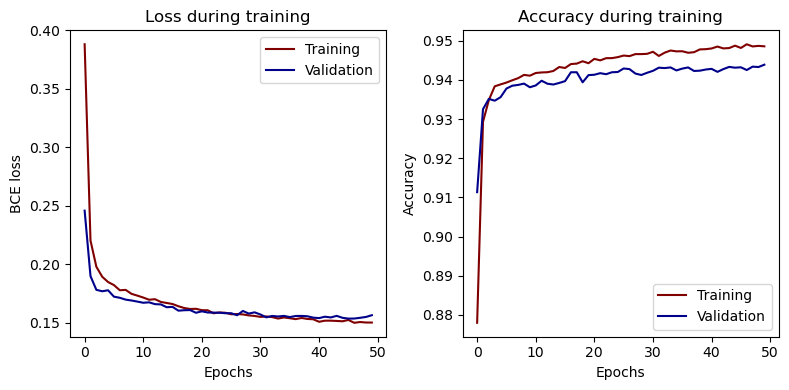

In [23]:
# Print the final accuracy of the model 
print_final_accuracy(history.history)

# Plot the loss and accuracy while training simpole model
plot_training_metrics(history_dict=history.history)

## **Exercise 6**

Now we will test the model's performance as an event classifier

In [48]:
# Get classification probabilities of validation dataset using improved model
validation_probability  = improved_network.predict(val_data).flatten()
training_probability    = improved_network.predict(train_data).flatten()

# Apply a simple threshold of 0.5 to get network predictions
validation_predictions  = (validation_probability>0.5).astype(int)
training_predictions    = (training_probability>0.5).astype(int)

# Test that the validation_predicition object contains binary clasification of [0, 1]
print(f"Network prediction range: {np.unique(validation_predictions)}")

2189/2189 [==============================] - 2s 1ms/step
Network prediction range: [0 1]


We now use ```sklearn``` in order to compute different metric scores to test our models performance

In [49]:
# Compute accuracy
validation_accuracy = accuracy_score(val_target, validation_predictions)
print(f"The validation accuracy of the improved model is {validation_accuracy:.2%}")

The validation accuracy of the improved model is 94.39%


Text(0.5, 1.03, 'Conf. matric of imrpoved network')

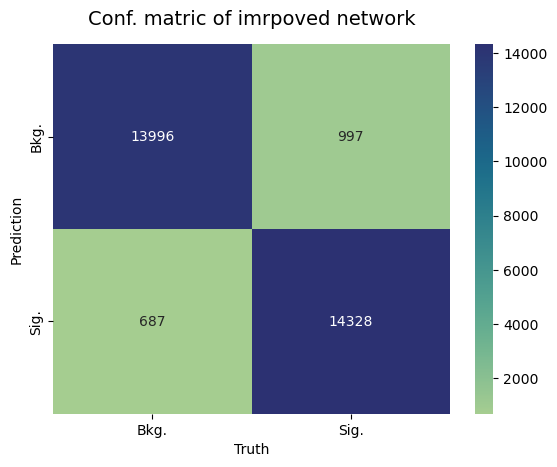

In [50]:
# Compute and plot a confusion matrix
conf_matrix = confusion_matrix(val_target, validation_predictions,)
conf_matrix = pd.DataFrame(conf_matrix, index=["Bkg.", "Sig."], columns=["Bkg.", "Sig."])

sns.heatmap(conf_matrix, cmap="crest", annot=True, fmt=".0f")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Conf. matric of imrpoved network", fontsize=14, y=1.03)

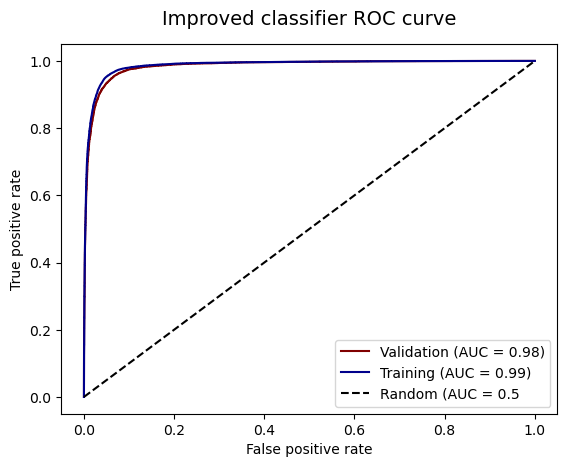

In [55]:
# Compute the false positive and true positive rate of for the roc curve
fpr_val, tpr_val, _     = roc_curve(val_target, validation_probability,)
fpr_train, tpr_train, _ = roc_curve(train_target, training_probability,)

# Compute the area under curve for the roc curve
aoc_val     = roc_auc_score(val_target, validation_probability)
aoc_train   = roc_auc_score(train_target, training_probability)

# Plot the ROC curve
plt.plot(fpr_val, tpr_val, color="maroon", label=f"Validation (AUC = {aoc_val:.2f})")
plt.plot(fpr_train, tpr_train, color="darkblue", label=f"Training (AUC = {aoc_train:.2f})")
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color="black", label="Random (AUC = 0.5)", linestyle="--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Improved classifier ROC curve", fontsize=14, y=1.03)
plt.legend()